In [38]:
import os
import datetime

import IPython
import IPython.display
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

In [39]:
csv_path = 'C:/Users/Windows10/Desktop/코딩/data/jena_climate_2009_2016.csv'

df = pd.read_csv(csv_path)

# 행 데이터를 5번째 인덱스부터 6개 데이터 간격으로 불러온다.
# 날씨 데이터는 10분 간격으로 데이터가 이루어져 있기 때문에
# 이렇게 나누게 되면 자연스레 1시간 간격의 데이터가 만들어진다.

df = df[5::6]

date_time = pd.to_datetime(df.pop('Date Time'), format = '%d.%m.%Y %H:%M:%S')

In [40]:
df.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


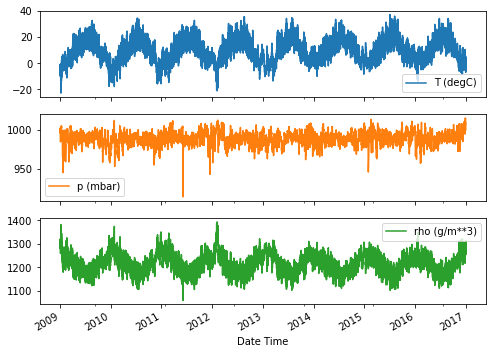

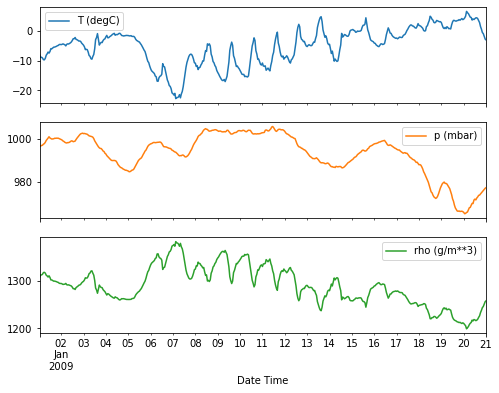

In [41]:
# 전체 데이터에 대한 그래프
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots = True)

# 데이터 중 일부분에 대한 그래프
plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots = True)

In [42]:
#데이터 전체 통계

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [43]:
print('문제점')
print(f'wv (m/s).min : {df["wv (m/s)"].min()}')
print(f'max. wv (m/s).min : {df["max. wv (m/s)"].min()}')

문제점
wv (m/s).min : -9999.0
max. wv (m/s).min : -9999.0


In [44]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0 # 마스킹
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == 9999.0
max_wv[bad_max_wv] = 0.0

df['wv (m/s)'].min()

0.0

# 특성 엔지니어링
- 적절한 형식의 데이터로 변환

Text(0, 0.5, 'Wind Velocity [m/s]')

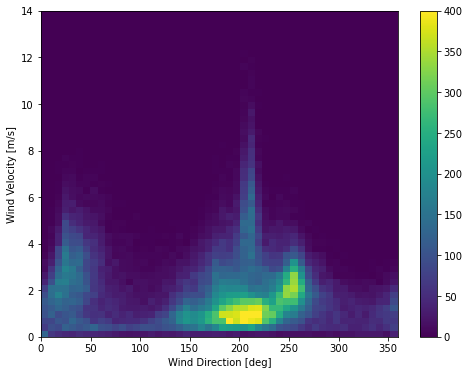

In [45]:
# 풍향과 풍속을 2차원 히스토그램으로 나타냄

plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins = (50, 50), vmax = 400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [46]:
# 풍향과 풍속을 합쳐서 벡터로 만듬
# 벡터는 속도와 방향성을 둘다 지님

wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# 각도를 라디안으로 변환
wd_rad = df.pop('wd (deg)') * np.pi / 180

# 바람의 x, y요소를 계산함
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv * np.sin(wd_rad)

# 최대 바람의 x, y요소를 계산함
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

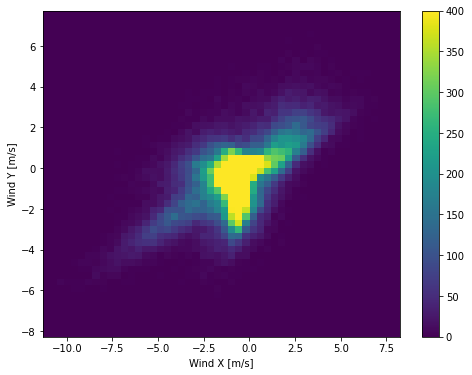

In [47]:
plt.hist2d(df['Wx'], df['Wy'], bins = (50, 50), vmax = 400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

- 시간

In [48]:
# 시간을 초로 변환

timestamp_s = date_time.map(datetime.datetime.timestamp)
print(timestamp_s)

5         1.230739e+09
11        1.230743e+09
17        1.230746e+09
23        1.230750e+09
29        1.230754e+09
              ...     
420521    1.483179e+09
420527    1.483183e+09
420533    1.483186e+09
420539    1.483190e+09
420545    1.483193e+09
Name: Date Time, Length: 70091, dtype: float64


In [49]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

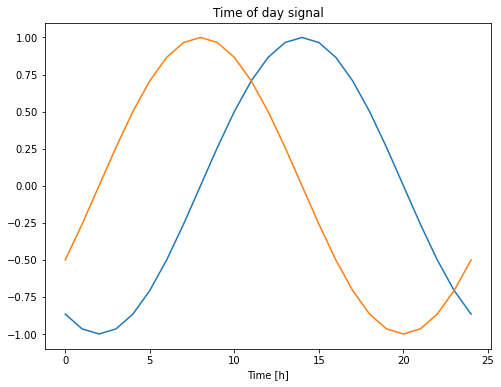

In [50]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

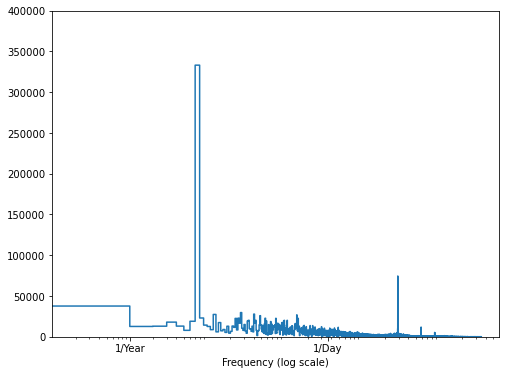

In [51]:
fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24 * 365.2524
years_per_dataset = n_samples_h / (hours_per_year)

f_per_year = f_per_dataset / years_per_dataset
plt.step(f_per_dataset, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels = ['1/Year', '1/Day'])
_ = plt.xlabel('Frequency (log scale)')